In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def gradient_descent(a:int,b:int,lr:int,X:np.array,Y:np.array,n,max_steps:int,cost_func,grad_decr):
    """
    a,b : coeffs. inputs a,b are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    n : number of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-6
    cost = 1000
    for step in range(max_steps):
        a_prev,b_prev,cost_prev = a,b,cost
        
        Y_pred = a*X - b
        decr_a,decr_b = grad_decr(n,Y,Y_pred,X)

        a = a_prev - lr*decr_a
        b = b_prev - lr*decr_b

        cost = cost_func(X,Y,n,a,b)
        costs.append(cost)
        print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return a,b

In [75]:
def mse(x:np.array,y:np.array,n:int,a:float,b:float):
    return (1/n)*np.sum((y-(a*x+b))**2)

In [76]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return rss/tss

In [77]:
def grad_decr_least_squares(n,Y,Y_pred,X):
    return \
        (-2/n)*np.sum((Y-Y_pred)*X), \
        (2/n)*np.sum(Y-Y_pred)

In [78]:
def grad_decr_r_squared(n,Y,Y_pred,X):
    y_mean = np.sum(Y)/n
    tss = np.sum((Y-y_mean)**2)

    return \
        (-2/tss)*np.sum((Y-Y_pred)*X), \
        (2/tss)*np.sum(Y-Y_pred)

In [79]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,6,8,10])

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

score_df = pd.read_csv("data/score.csv")
score_df

x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],train_size=0.9,random_state=42)

In [81]:
X = x_train
Y = y_train

In [82]:
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000

580.8172321496015
159.77097575491374
83.28594756382493
65.14420963276103
59.86238297157503
58.15439342276659
57.58043288458217
57.38758843708198
57.325632126165736
57.30896806901061
57.30800888930661
57.312489600231785
57.31884433892071
57.32583387338316
57.33302750660498
57.34027557688971
57.34752611340829
57.35476110445252
57.361974343113815
57.36916372594789
57.376328575811385
57.38346871121529
57.39058412281147
57.39767486093128
57.404740996492066
57.41178260740785
57.41879977386525
57.425792576682056
57.4327610967368
57.43970541477062
57.44662561131913
57.45352176668853
57.460393960948245
57.46724227392837
57.47406678521913
57.48086757417117
57.48764471989568
57.49439830126502
57.50112839691376
57.507835085238234
57.51451844439772
57.521178552314964
57.52781548667644
57.53442932493282
57.541020144299864
57.547588021758784
57.55413303405674
57.560655257707175
57.567154768990775
57.57363164395561
57.58008595841791
57.58651778796249
57.59292720794333
57.59931429348415
57.605679119478

58.22799906059735
58.232158711113996
58.23630367904168
58.240434015015396
58.24454976950424
58.248650992812216
58.25273773507806
58.256810046276385
58.26086797621765
58.26491157454897
58.2689408907543
58.272955974155366
58.27695687391142
58.280943639020435
58.2849163183191
58.28887496048353
58.29281961402969
58.296750327313696
58.300667148532575
58.30457012572449
58.30845930676918
58.312334739388646
58.31619647114751
58.32004454945336
58.32387902155749
58.3276999345548
58.33150733538512
58.33530127083284
58.33908178752777
58.34284893194567
58.34660275040839
58.35034328908464
58.354070593990194
58.357784710988646
58.36148568579146
58.36517356395868
58.368848390899345
58.372510211871955
58.37615907198501
58.379795016197015
58.383418089317495
58.38702833600718
58.39062580077818
58.3942105279952
58.397782561875076
58.401341946487804
58.40488872575674
58.40842294345916
58.41194464322661
58.41545386854534
58.41895066275689
58.42243506905837
58.4259071305028
58.42936688999986
58.4328143903161

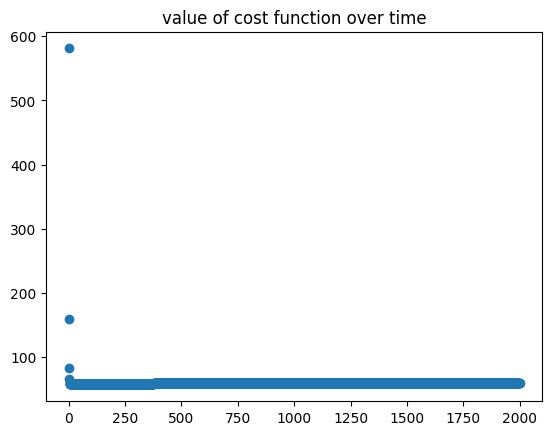

In [83]:
a,b = gradient_descent(a,b,lr,X,Y,n,max_steps,cost_func=mse,grad_decr=grad_decr_least_squares)

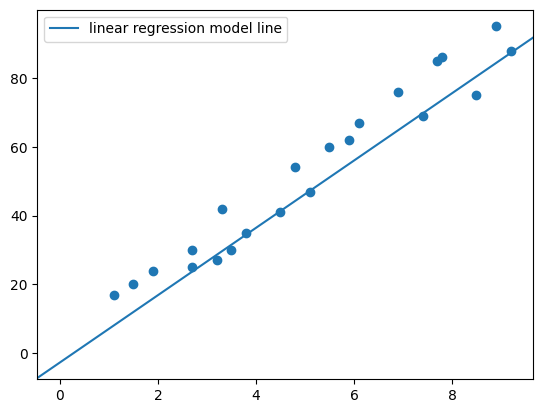

In [84]:
fig,ax  = plt.subplots()
ax.scatter(X,Y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()

In [85]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss

Graphics utility

In [86]:
def plot_data(
    x, y, title, xlabel, ylabel, a_s=None, b_s=None, labels=None, colors=None
):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if a_s and b_s:
        if not labels:
            labels = ["" for a in a_s]
        if not colors:
            colors = ["C0" for a in a_s]
        # fig,ax  = plt.subplots()
        for a, b, color, label in zip(a_s, b_s, colors, labels):
            ax.axline((0, b), slope=a, color=color, label=label)
            ax.legend()

    fig.show()
    plt.show()

Modularization of steps for gradient descent

In [87]:
class StraightLinearRegressorGrad():
    def fit(self,x,y,init_a=-1,init_b=0,lr=0.05,n=None,max_steps=500,cost_func=mse,grad_decr=grad_decr_least_squares):
        if not n:
            n = len(x)
        
        self.a,self.b = gradient_descent(a=init_a,b=init_b,lr=lr,X=x,Y=y,n=n,max_steps=max_steps,cost_func=cost_func,grad_decr=grad_decr)

    def predict(self,x:np.array):
        # n = len(x)
        y = a*x + b
        return y

    def score(self,x,y):
        return r_squared(x,y,len(x),self.a,self.b)

Applications

In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [89]:
score_df = pd.read_csv("data/score.csv")
score_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [90]:
x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],test_size=0.5,random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


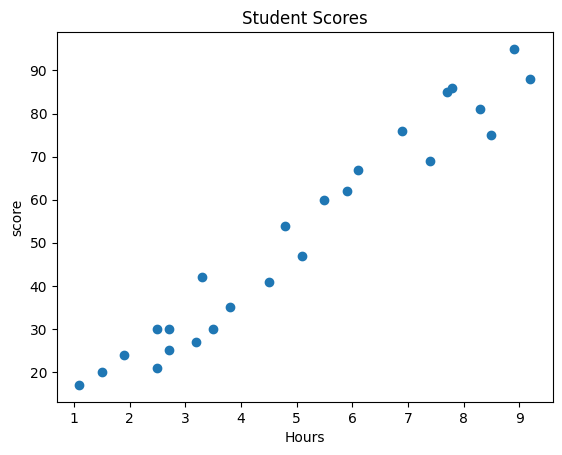

In [91]:
plot_data(score_df["Hours"],score_df["Scores"],title="Student Scores",xlabel="Hours",ylabel="score")

382.1768435185186
105.0969423257925
72.33854521463192
66.5799286971288
65.49743687590748
65.43554205815133
65.61325442642823
65.84840128701413
66.09749998634999
66.35010896753023
66.60371265995644
66.85769992117181
67.11191740862246
67.36632188393935
67.62089663808553
67.87563140255921
68.13051752044518
68.38554678528385
68.64071116149265
68.8960027166637
69.15141360478333
69.40693606169371
69.66256240350029
69.91828502569025
70.17409640242712
70.42998908588882
70.68595570562297
70.94198896790789
71.19808165511932
71.45422662510205
71.710416810547
71.96664521837215
72.22290492910872
72.47918909629209
72.73549094585674
72.99180377553664
73.24812095426951
73.50443592160629
73.7607421871242
74.01703332984525
74.27330299765879
74.52954490674819
74.78575284102229
75.04192065155084
75.29804225600476
75.55411163810038
75.81012284704758
76.06606999700287
76.32194726652625
76.57774889804193
76.83346919730396
77.08910253286493
77.3446433355503
77.60008609793445
77.85542537382315
78.1106557777384

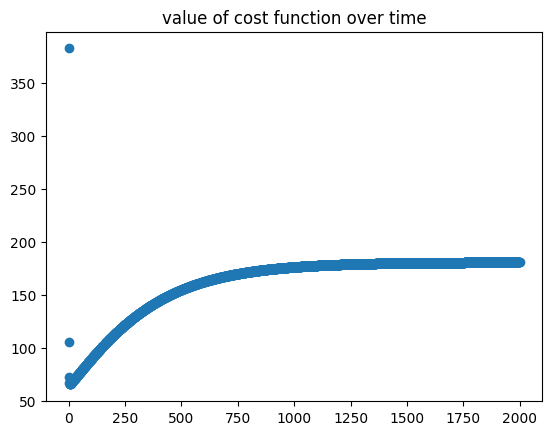

LinearRegression()

In [92]:
custom_reg = StraightLinearRegressorGrad()
custom_reg.fit(init_a=0,init_b=-1,lr=0.01,x=x_train,y=y_train,max_steps=2000,cost_func=mse,grad_decr=grad_decr_least_squares)
"""
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000
"""
sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in X],Y)
#reg.intercept_,reg.coef_

In [93]:
print(custom_reg.a,custom_reg.b)

9.238077958177303 -6.119422647733963


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


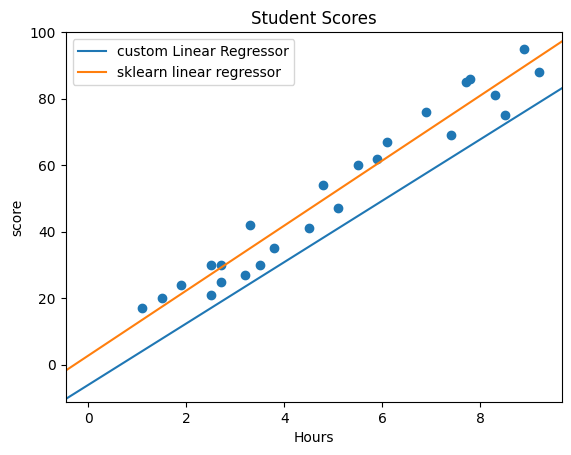

In [94]:
plot_data(score_df["Hours"],score_df["Scores"],title="Student Scores",xlabel="Hours",ylabel="score",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [95]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.9551351544807877

In [96]:
custom_reg.score(x_test,y_test)

0.7548430327996476

In [97]:
salary_df = pd.read_csv("data/Salary_Data.csv")
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [98]:
x_train,x_test,y_train,y_test = train_test_split(salary_df["YearsExperience"],salary_df["Salary"],test_size=0.5,random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


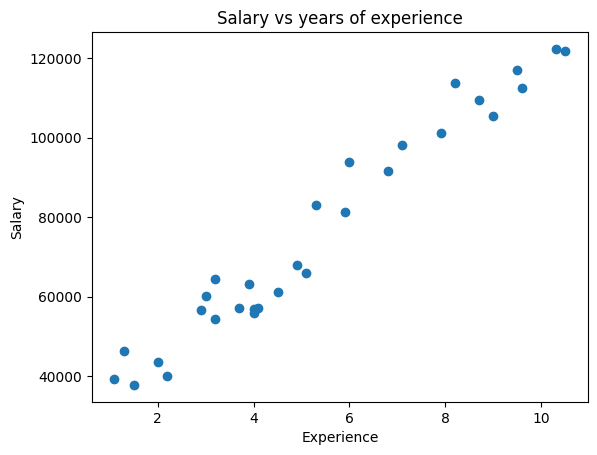

In [99]:
plot_data(salary_df["YearsExperience"],salary_df["Salary"],title="Salary vs years of experience",xlabel="Experience",ylabel="Salary")

6782580800.432069
6684617930.6894
6588151352.125624
6493157985.488481
6399615109.209703
6307500353.849339
6216791696.626415
6127467456.034672
6039506286.542006
5952887173.372304
5867589427.36843
5783592679.935074
5700876878.0602255
5619422279.414043
5539209447.523941
5460219247.024663
5382432838.982235
5305831676.2905855
5230397499.139752
5156112330.55454
5082958472.002527
5010918499.070366
4939975257.207289
4870111857.534788
4801311672.721449
4733558332.921895
4666835721.778881
4601127972.487521
4536419463.92072
4472694816.814807
4409938890.014496
4348136776.776197
4287273801.1287985
4227335514.291019
4168307691.144457
4110176326.761452
4052927632.9869313
3996548035.073377
3941024168.36811
3886342875.0520597
3832491200.9292264
3779456392.266048
3727225892.6798944
3675787340.075926
3625128563.631553
3575237580.827783
3526102594.526693
3477711990.0943375
3430054332.5683613
3383118363.8696475
3336893000.057293
3291367328.626252
3246530605.846976
3202372254.146403
3158881859.5296454
31160

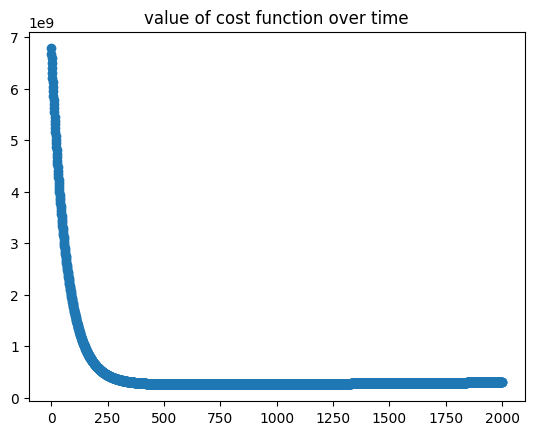

LinearRegression()

In [129]:
custom_reg = StraightLinearRegressorGrad()
custom_reg.fit(init_a=0,init_b=-1,lr=0.0001,x=x_train,y=y_train,max_steps=2000,cost_func=mse,grad_decr=grad_decr_least_squares)
"""
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000
"""
sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


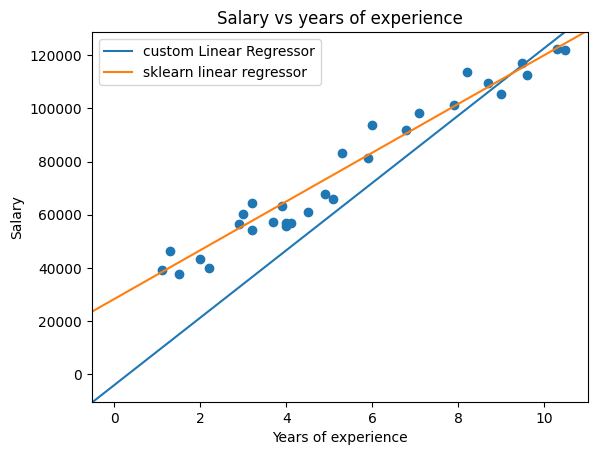

In [130]:
plot_data(salary_df["YearsExperience"],salary_df["Salary"],title="Salary vs years of experience",xlabel="Years of experience",ylabel="Salary",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [131]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.940087016255447

In [132]:
custom_reg.score(x_test,y_test)

0.6537917251882817